# whisper_pandas tutorial

This is a basic introduction how to use `whisper_pandas`. It also explains a bit what's in Whisper files and archives along the way.

Content (planned):

* TBD: Read file, summarise, plots
* TBD: Show details how to work with timestamps and values in Pandas
* TBD: Show how to write to Parquet
* TBD: Create and update file from scratch and show content

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import whisper_pandas

## Read Whisper file

In [2]:
wsp = whisper_pandas.WhisperFile.read("data/example.wsp.gz")

## Summary metadata and archives

In [3]:
wsp

WhisperFile(meta=WhisperFileMeta(path='data/example.wsp.gz', aggregation_method='average', max_retention=315363600, x_files_factor=0.5, archives=[WhisperArchiveMeta(index=0, offset=52, seconds_per_point=10, points=1555200), WhisperArchiveMeta(index=1, offset=18662452, seconds_per_point=60, points=5256000), WhisperArchiveMeta(index=2, offset=81734452, seconds_per_point=3600, points=87601)]))

In [4]:
wsp.print_info()

                                  value
path                data/example.wsp.gz
actual size                    21696528
expected size                  82785664
aggregation_method              average
max_retention                 315363600
x_files_factor                      0.5

         seconds_per_point   points  retention    offset      size
archive                                                           
0                       10  1555200   15552000        52  18662400
1                       60  5256000  315360000  18662452  63072000
2                     3600    87601  315363600  81734452   1051212


In [5]:
wsp.meta.describe_meta()

,value
path,data/example.wsp.gz
actual size,21696528
expected size,82785664
aggregation_method,average
max_retention,315363600
x_files_factor,0.5


In [6]:
wsp.meta.describe_archives()

,seconds_per_point,points,retention,offset,size
archive,,,,,
0,10,1555200,15552000,52,18662400
1,60,5256000,315360000,18662452,63072000
2,3600,87601,315363600,81734452,1051212


In [7]:
# TODO: create archive table summary on values and timestamps

In [8]:
# TODO: plot archive retention bar charts and where values are filled

## Data access

The `WhisperArchive.to_frame` method returns the data as a `pandas.DataFrame`.

In [9]:
wsp.archives[0].to_frame()

,timestamp,value
43687,2020-07-29 08:28:10+00:00,0.000000
43688,2020-07-29 08:28:20+00:00,0.000000
43689,2020-07-29 08:28:30+00:00,0.000000
43690,2020-07-29 08:28:40+00:00,0.000000
70228,2020-08-01 10:11:40+00:00,0.000000
...,...,...
10991,2021-07-20 13:38:50+00:00,4.077281
10992,2021-07-20 13:39:00+00:00,4.100306
10993,2021-07-20 13:39:10+00:00,4.123771
10994,2021-07-20 13:39:20+00:00,4.093601


There are several options to control the format, point selection and order:

In [10]:
help(whisper_pandas.WhisperArchive.to_frame)

Help on function to_frame in module whisper_pandas:

to_frame(self, dtype: 'str' = 'float64', to_datetime: 'bool' = True, drop_time_zero: 'bool' = True, time_sort: 'bool' = True) -> 'pd.DataFrame'
    Convert archive data to pandas.DataFrame.
    
    Parameters
    ----------
    dtype : str
        Data type for point values
    to_datetime : bool
        Convert from Unix int timestamps to pandas timestamps?
    drop_time_zero : bool
        Drop points where time is 0, i.e. that were never filled?
    time_sort : bool
        Sort points in chronological order?
    
    Returns
    -------
    df : pandas.DataFrame
        Dataframe with columns "timestamp" and "value" and the
        point position index in the Whisper archive as index.



For example here's how to get the full data array, including points that haven't been filled in the Whisper file, in the original order.

It shows that the DataFrame index is set to the point index in the Whisper archive, and that in WhisperDB timestamps are Unix second integers.

In [11]:
wsp.archives[0].to_frame(dtype="float64", to_datetime=False, drop_time_zero=False, time_sort=False)

,timestamp,value
0,1626678420,4.223186
1,1626678430,4.180295
2,1626678440,4.188692
3,1626678450,4.225528
4,1626678460,4.171471
...,...,...
1555195,1626678370,4.182014
1555196,1626678380,4.226593
1555197,1626678390,4.201265
1555198,1626678400,4.174173


If you want a `pandas.Series` of the values with timestamps as index, you can get it like this:

In [12]:
wsp.archives[0].to_frame().set_index("timestamp")["value"]

timestamp
2020-07-29 08:28:10+00:00    0.000000
2020-07-29 08:28:20+00:00    0.000000
2020-07-29 08:28:30+00:00    0.000000
2020-07-29 08:28:40+00:00    0.000000
2020-08-01 10:11:40+00:00    0.000000
                               ...   
2021-07-20 13:38:50+00:00    4.077281
2021-07-20 13:39:00+00:00    4.100306
2021-07-20 13:39:10+00:00    4.123771
2021-07-20 13:39:20+00:00    4.093601
2021-07-20 13:39:30+00:00    4.081736
Name: value, Length: 1555200, dtype: float64

Here's the second archive:

In [13]:
wsp.archives[1].meta

WhisperArchiveMeta(index=1, offset=18662452, seconds_per_point=60, points=5256000)

In [14]:
wsp.archives[1].to_frame()

,timestamp,value
0,2017-02-10 07:07:00+00:00,0.000000
1,2017-02-10 07:08:00+00:00,0.000000
2,2017-02-10 07:09:00+00:00,0.000000
3,2017-02-10 07:10:00+00:00,0.000000
4,2017-02-10 07:11:00+00:00,0.000000
...,...,...
2331010,2021-07-20 13:35:00+00:00,4.099915
2331011,2021-07-20 13:36:00+00:00,4.104024
2331012,2021-07-20 13:37:00+00:00,4.099772
2331013,2021-07-20 13:38:00+00:00,4.101358


And the last archive, which in this case is minute-resolution:

In [15]:
wsp.archives[2].meta

WhisperArchiveMeta(index=2, offset=81734452, seconds_per_point=3600, points=87601)

In [16]:
wsp.archives[2].to_frame()

,timestamp,value
0,2017-02-10 07:00:00+00:00,0.000000
1,2017-02-10 08:00:00+00:00,0.000000
2,2017-02-10 09:00:00+00:00,0.000000
3,2017-02-10 10:00:00+00:00,0.000000
4,2017-02-10 11:00:00+00:00,0.000000
...,...,...
38850,2021-07-20 09:00:00+00:00,4.100146
38851,2021-07-20 10:00:00+00:00,4.099958
38852,2021-07-20 11:00:00+00:00,4.099795
38853,2021-07-20 12:00:00+00:00,4.100198


## Data analysis

Now that we have the data nicely formatted we can use pandas and PyData tools such as e.g. matplotlib or scikit-learn or whatever we like to analyse the data.

<Figure size 1080x360 with 0 Axes>

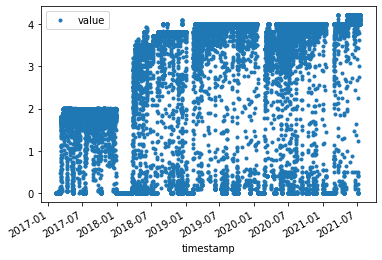

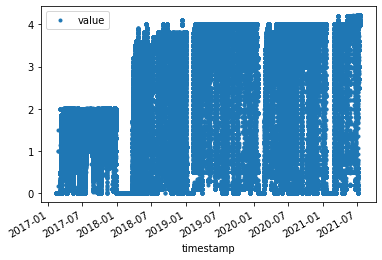

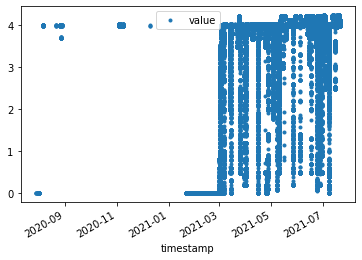

In [17]:
plt.figure(figsize=(15, 5))
wsp.archives[2].to_frame().set_index("timestamp").plot(style=".", label="Archive 2")
wsp.archives[1].to_frame().set_index("timestamp").plot(style=".", label="Archive 1")
wsp.archives[0].to_frame().set_index("timestamp").plot(style=".", label="Archive 0")
plt.legend();

In [18]:
# TODO: show a plot already!

## Data types and pandas

In [19]:
# TODO: show details on data types and how to work with timestamps & values in pandas

## Write to Parquet

Nowadays Parquet is a very common file format for tabular data. You can use `whisper_pandas` to convert Whisper files to Parquet like this:

In [20]:
df = wsp.archives[0].to_frame()
df.to_parquet("data/example_archive0.parquet")

If you wanted to, you could also combine the data from multiple archives e.g. like this:

In [21]:
df0 = wsp.archives[0].to_frame().reset_index()
df0.insert(0, "archive", 0)
df1 = wsp.archives[1].to_frame().reset_index()
df1.insert(0, "archive", 1)
df2 = wsp.archives[2].to_frame().reset_index()
df2.insert(0, "archive", 2)
df = pd.concat([df0, df1, df2])
df

,archive,index,timestamp,value
0,0,43687,2020-07-29 08:28:10+00:00,0.000000
1,0,43688,2020-07-29 08:28:20+00:00,0.000000
2,0,43689,2020-07-29 08:28:30+00:00,0.000000
3,0,43690,2020-07-29 08:28:40+00:00,0.000000
4,0,70228,2020-08-01 10:11:40+00:00,0.000000
...,...,...,...,...
38850,2,38850,2021-07-20 09:00:00+00:00,4.100146
38851,2,38851,2021-07-20 10:00:00+00:00,4.099958
38852,2,38852,2021-07-20 11:00:00+00:00,4.099795
38853,2,38853,2021-07-20 12:00:00+00:00,4.100198


Of course you could drop or add any column you like (e.g. "archive" or "index") or assemble or change the `pandas.DataFrame` in any way you like.
Let's drop the `index` column (which was the point index in the Whisper archive), and also let's not write the row index to the Parquet file as an example:

In [22]:
df.drop(columns=["index"]).to_parquet("data/example.parquet", index=False)

Like Whisper, Parquet is lossless, so the data comes back bit by bit identical:

In [23]:
pd.read_parquet("data/example.parquet")

,archive,timestamp,value
0,0,2020-07-29 08:28:10+00:00,0.000000
1,0,2020-07-29 08:28:20+00:00,0.000000
2,0,2020-07-29 08:28:30+00:00,0.000000
3,0,2020-07-29 08:28:40+00:00,0.000000
4,0,2020-08-01 10:11:40+00:00,0.000000
...,...,...,...
3925065,2,2021-07-20 09:00:00+00:00,4.100146
3925066,2,2021-07-20 10:00:00+00:00,4.099958
3925067,2,2021-07-20 11:00:00+00:00,4.099795
3925068,2,2021-07-20 12:00:00+00:00,4.100198


## Create new file and update values

In [24]:
# TODO: show example how to create a new file and update values
# TBD: use whisper for that or implement it in whisper-pandas?